In [56]:
%matplotlib inline 
from d2l import tensorflow as d2l
import tensorflow as tf
import random

In [84]:
def synthetic_data(w,b,num_examples):#@save
    X = tf.zeros((num_examples,w.shape[0]))
    X+= tf.random.normal(shape=X.shape)
    y = tf.matmul(X,tf.reshape(w, (-1,1))) + b
    y+= tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1,1))
    return X,y
true_w = tf.constant([2,-3.4])
true_b = 4.2
print(tf.random.normal(shape=(1000,2)))
features, labels = synthetic_data(true_w, true_b, 1000)

tf.Tensor(
[[-1.0532846   2.7850714 ]
 [ 0.77241755 -0.05148092]
 [-0.58072907 -0.9165641 ]
 ...
 [ 0.5673183  -0.57373166]
 [-0.7451306  -0.68895906]
 [ 2.6021435   0.87276727]], shape=(1000, 2), dtype=float32)


In [58]:
print('features:',features[0],'\nlabel:',labels[0])

features: tf.Tensor([-0.7414992   0.82172793], shape=(2,), dtype=float32) 
label: tf.Tensor([-0.06782622], shape=(1,), dtype=float32)


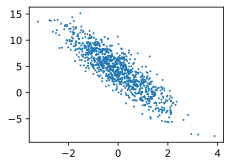

In [59]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].numpy(), labels.numpy(),1)

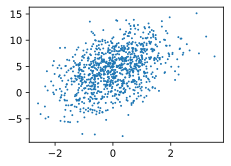

In [60]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(0)].numpy(), labels.numpy(),1)

In [61]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i+batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [62]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n',y)
    break

tf.Tensor(
[[-0.25535017 -0.4008526 ]
 [ 1.0881411   0.72776717]
 [ 0.8237887   2.0661993 ]
 [-0.19693124 -0.35076624]
 [-0.39296374  0.1775214 ]
 [ 0.37140357 -0.8772582 ]
 [ 0.56923     0.48703364]
 [ 0.7878877   1.4051174 ]
 [ 0.73972917 -0.51569474]
 [ 1.315518   -1.0680357 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 5.0544176]
 [ 3.9196157]
 [-1.1695439]
 [ 5.012112 ]
 [ 2.810522 ]
 [ 7.94556  ]
 [ 3.691889 ]
 [ 0.9993529]
 [ 7.426427 ]
 [10.4657345]], shape=(10, 1), dtype=float32)


In [63]:
w = tf.Variable(tf.random.normal(shape=(2,1), mean=0, stddev=0.01), trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [64]:
def linreg(X,w,b): #@save
    return tf.matmul(X,w)+b

In [65]:
def squared_loss(y_hat, y): #@save
    return (y_hat-tf.reshape(y, y_hat.shape))**2/2

In [66]:
def sgd(params, grads, lr, batch_size): #@save
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

In [73]:
lr = 0.002
num_epochs = 50
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l=loss(net(X,w,b),y)
        dw, db = g.gradient(l, [w,b])
        sgd([w,b], [dw,db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch+1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.000049
epoch 2, loss 0.000049
epoch 3, loss 0.000049
epoch 4, loss 0.000049
epoch 5, loss 0.000049
epoch 6, loss 0.000049
epoch 7, loss 0.000049
epoch 8, loss 0.000049
epoch 9, loss 0.000049
epoch 10, loss 0.000049
epoch 11, loss 0.000049
epoch 12, loss 0.000049
epoch 13, loss 0.000049
epoch 14, loss 0.000049
epoch 15, loss 0.000049
epoch 16, loss 0.000049
epoch 17, loss 0.000049
epoch 18, loss 0.000049
epoch 19, loss 0.000049
epoch 20, loss 0.000049
epoch 21, loss 0.000049
epoch 22, loss 0.000049
epoch 23, loss 0.000049
epoch 24, loss 0.000049
epoch 25, loss 0.000049
epoch 26, loss 0.000049
epoch 27, loss 0.000049
epoch 28, loss 0.000049
epoch 29, loss 0.000049
epoch 30, loss 0.000049
epoch 31, loss 0.000049
epoch 32, loss 0.000049
epoch 33, loss 0.000049
epoch 34, loss 0.000049
epoch 35, loss 0.000049
epoch 36, loss 0.000049
epoch 37, loss 0.000049
epoch 38, loss 0.000049
epoch 39, loss 0.000049
epoch 40, loss 0.000049
epoch 41, loss 0.000049
epoch 42, loss 0.000049
e

In [72]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b -b}')

error in estimating w: [-0.00039864 -0.00022173]
error in estimating b: [0.0001936]


In [54]:
w,b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 2.001381 ],
        [-3.4037185]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.2000265], dtype=float32)>)

In [39]:
squared_loss

<function __main__.squared_loss(y_hat, y)>